In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2022-05-13 16:01:26.345920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
tf.config.experimental.list_physical_devices()

2022-05-13 16:01:38.854860: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-13 16:01:38.856507: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-13 16:01:38.934686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 16:01:38.935114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 335.32GiB/s
2022-05-13 16:01:38.935156: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-05-13 16:01:39.444979: I tensorflow/stream_executor/platform/d

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

so returning NUMA node zero
2022-05-13 16:01:41.412584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 16:01:41.412755: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1862] Adding visible gpu devices: 0


In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
# checking images shape
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
# display single image shape
X_train[0].shape

(32, 32, 3)

In [7]:
# checking labels
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# scaling image values between 0-1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [9]:
# one hot encoding labels
y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [10]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])
    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [11]:
%%timeit -n1 -r1
# CPU
with tf.device('/CPU:0'):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

2022-05-13 16:02:09.358780: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-13 16:02:09.375637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 16:02:09.376008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 335.32GiB/s
2022-05-13 16:02:09.376059: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library li

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9314 - accuracy: 0.3030
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6480 - accuracy: 0.4190
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5607 - accuracy: 0.4508
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4908 - accuracy: 0.4756
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4414 - accuracy: 0.4930
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3949 - accuracy: 0.5083
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3549 - accuracy: 0.5220
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3099 - accuracy: 0.5454
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2861 - accuracy: 0.5492
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [12]:
%%timeit -n1 -r1
# GPU
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

Epoch 1/10


2022-05-13 16:09:36.754135: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1563/1563 [==============================] - 68s 5ms/step - loss: 1.9354 - accuracy: 0.3021
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6435 - accuracy: 0.4197
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5491 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4871 - accuracy: 0.4749
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4413 - accuracy: 0.4913
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3983 - accuracy: 0.5092
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3534 - accuracy: 0.5260
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3089 - accuracy: 0.5405
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2851 - accuracy: 0.5450
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2514 - accura

In [13]:
%%timeit -n1 -r1
# GPU
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9370 - accuracy: 0.3052
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6487 - accuracy: 0.4212
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5596 - accuracy: 0.4491
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4936 - accuracy: 0.4713
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4367 - accuracy: 0.4960
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3854 - accuracy: 0.5141
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3564 - accuracy: 0.5265
Epoch 8/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3105 - accuracy: 0.5396
Epoch 9/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2840 - accuracy: 0.5496
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - l

In [14]:
# loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
# checking shape

print(train_images.shape)

print(train_labels[0])

(60000, 28, 28)
9


'Ankle boot'

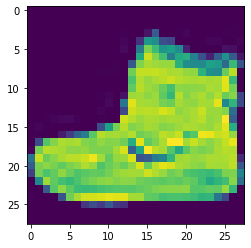

In [16]:
# checking images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[0])
class_names[train_labels[0]]

In [17]:
# scaling
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [18]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    model = keras.Sequential(layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(hidden_layers=5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6317 - accuracy: 0.7686
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3992 - accuracy: 0.8587
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3558 - accuracy: 0.8718
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8786
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.8893
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8928
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.8969
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2707 - accuracy: 0.9019
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2611 - accuracy: 0.9040
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [20]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(hidden_layers=5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6627 - accuracy: 0.7585
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4083 - accuracy: 0.8536
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3559 - accuracy: 0.8664
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3263 - accuracy: 0.8813
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3121 - accuracy: 0.8873
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2896 - accuracy: 0.8944
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2786 - accuracy: 0.8955
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.8987
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9042
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.246

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(hidden_layers=5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=300)

Epoch 1/300
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6454 - accuracy: 0.7609
Epoch 2/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4040 - accuracy: 0.8538
Epoch 3/300
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3574 - accuracy: 0.8692
Epoch 4/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3319 - accuracy: 0.8784
Epoch 5/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3069 - accuracy: 0.8898
Epoch 6/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8914
Epoch 7/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.8963
Epoch 8/300
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2628 - accuracy: 0.9051
Epoch 9/300
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2564 - accuracy: 0.9071
Epoch 10/300
1875/1875 [==============================] - 4s 2ms/step - l